In [1]:
#Build the linear regression model using scikit learn in boston data to predict 'Price'based on other dependent variable.
#Here is the code to load the data
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
# this allows plots to appear directly in the notebook
%matplotlib inline
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [2]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['Price'] = boston.target
bos.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


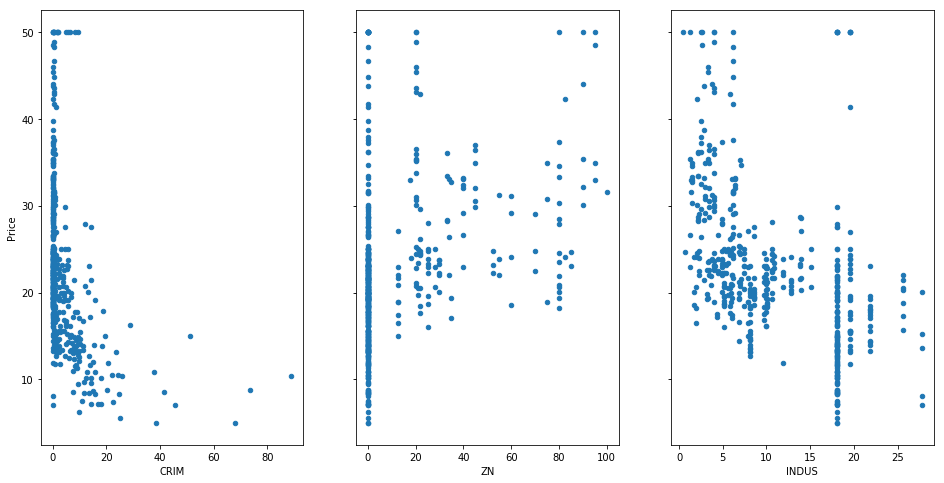

In [4]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
bos.plot(kind='scatter', x='CRIM', y='Price', ax=axs[0], figsize=(16, 8))
bos.plot(kind='scatter', x='ZN', y='Price', ax=axs[1])
bos.plot(kind='scatter', x='INDUS', y='Price', ax=axs[2])

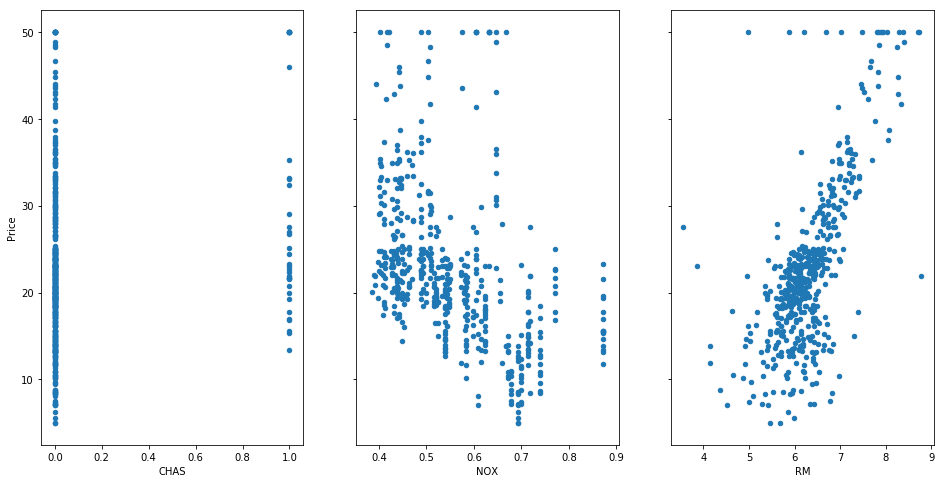

In [5]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
bos.plot(kind='scatter', x='CHAS', y='Price', ax=axs[0], figsize=(16, 8))
bos.plot(kind='scatter', x='NOX', y='Price', ax=axs[1], figsize=(16, 8))
bos.plot(kind='scatter', x='RM', y='Price', ax=axs[2], figsize=(16, 8))

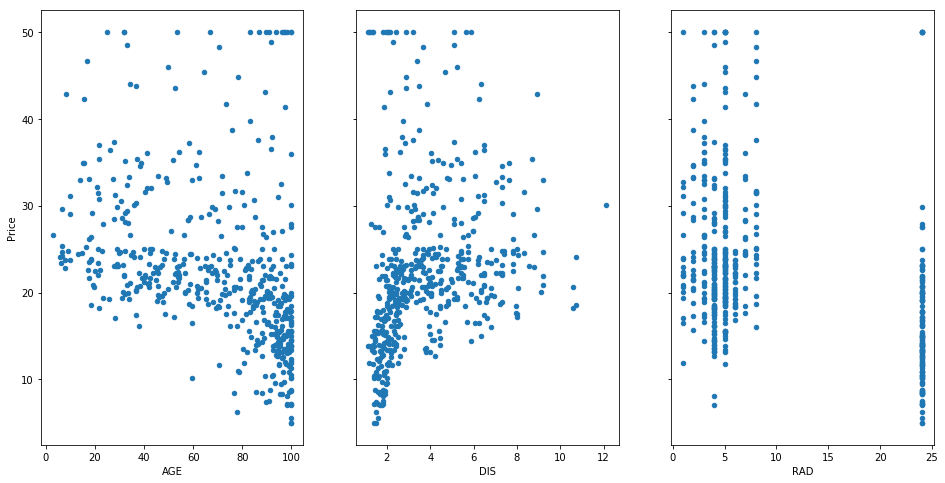

In [6]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
bos.plot(kind='scatter', x='AGE', y='Price', ax=axs[0], figsize=(16, 8))
bos.plot(kind='scatter', x='DIS', y='Price', ax=axs[1], figsize=(16, 8))
bos.plot(kind='scatter', x='RAD', y='Price', ax=axs[2], figsize=(16, 8))

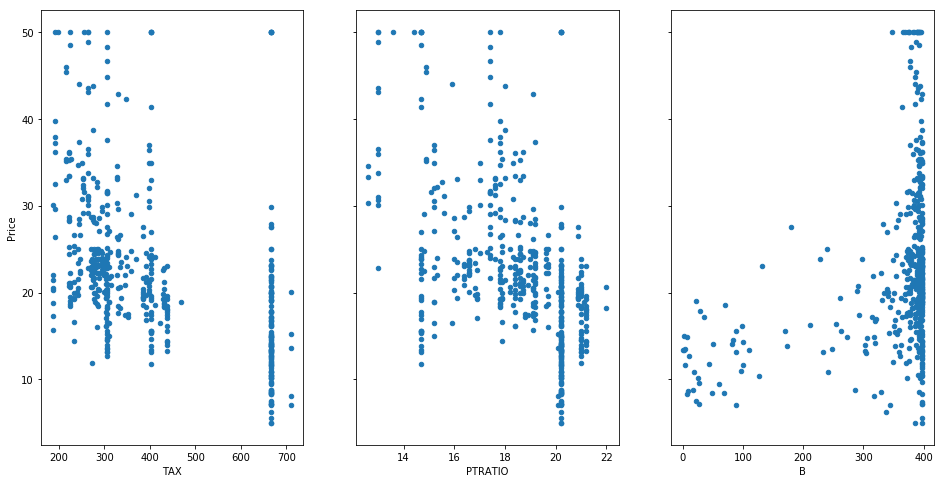

In [7]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
bos.plot(kind='scatter', x='TAX', y='Price', ax=axs[0], figsize=(16, 8))
bos.plot(kind='scatter', x='PTRATIO', y='Price', ax=axs[1], figsize=(16, 8))
bos.plot(kind='scatter', x='B', y='Price', ax=axs[2], figsize=(16, 8))

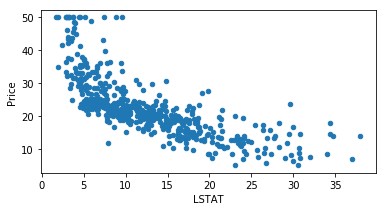

In [8]:
# visualize the relationship between the features and the response using scatterplots
bos.plot(kind='scatter', x='LSTAT', y='Price', figsize=(6, 3))

In [9]:
bos.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [26]:
# create X and y
feature_cols = ['CRIM','NOX','RM','DIS','RAD','PTRATIO','LSTAT']
X = bos[feature_cols]
y = bos.Price

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

41.335078327
[ -0.11600295 -21.23056462   4.037777    -1.24094476   0.11930566
  -1.15467345  -0.56149197]


In [27]:
bos[['CRIM','NOX','RM','DIS','RAD','PTRATIO','LSTAT','Price']].head(10)

,CRIM,NOX,RM,DIS,RAD,PTRATIO,LSTAT,Price
0,0.00632,0.538,6.575,4.0900,1.0,15.3,4.98,24.0
1,0.02731,0.469,6.421,4.9671,2.0,17.8,9.14,21.6
2,0.02729,0.469,7.185,4.9671,2.0,17.8,4.03,34.7
3,0.03237,0.458,6.998,6.0622,3.0,18.7,2.94,33.4
4,0.06905,0.458,7.147,6.0622,3.0,18.7,5.33,36.2
5,0.02985,0.458,6.430,6.0622,3.0,18.7,5.21,28.7
6,0.08829,0.524,6.012,5.5605,5.0,15.2,12.43,22.9
7,0.14455,0.524,6.172,5.9505,5.0,15.2,19.15,27.1
8,0.21124,0.524,5.631,6.0821,5.0,15.2,29.93,16.5
9,0.17004,0.524,6.004,6.5921,5.0,15.2,17.10,18.9


In [23]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Price ~ CRIM+NOX+RM+DIS+RAD+PTRATIO+LSTAT', data=bos).fit()
lm.conf_int() 
# We can consider Confidence interval i,e-Lower value and Upper value for the below features as good enough 
# because none of the features doesn't seem to pass through the value 0.00 so, it can be infered there is zero probability for any feature 
# not to be in correlation with the Price label

,0,1
Intercept,31.463346,51.206811
CRIM,-0.182004,-0.050002
NOX,-28.209358,-14.251771
RM,3.222665,4.852889
DIS,-1.569254,-0.912635
RAD,0.038664,0.199948
PTRATIO,-1.400722,-0.908625
LSTAT,-0.657253,-0.465731


In [17]:
lm.pvalues
# Below p values for features indicate that all of them are below 0.05(Level of significanace) 
# which has significant statistical impact on the label Price 

Intercept    1.690274e-15
CRIM         6.011332e-04
NOX          4.334660e-09
RM           1.308272e-20
DIS          4.879723e-13
RAD          3.814991e-03
PTRATIO      8.363490e-19
LSTAT        2.187591e-27
dtype: float64

In [24]:
lm.rsquared
# R squared value indicates that 71.61% change in variance of Price is explained by the change in variance of the above features selected to build the model 

0.7161384577134382

In [19]:
lm.summary()
# Considering the P value for the features and R-squared value, it looks like the model is good fit.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     179.5
Date:                Mon, 23 Jul 2018   Prob (F-statistic):          8.70e-132
Time:                        12:18:16   Log-Likelihood:                -1521.6
No. Observations:                 506   AIC:                             3059.
Df Residuals:                     498   BIC:                             3093.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.3351      5.024      8.227      0.000      31.463      51.207
CRIM          -0.1160      0.034     -3.453      0.001      -0.182      -0.050
NOX          -21.2306      3.552     -5.977      0.000     -28.209     -14.252
RM             4.0378      0.415      9.733      0.000       3.223       4.853
DIS           -1.2409      0.167     -7.426      0.000      -1.569      -0.913
RAD            0.1193      0.041      2.907      0.004       0.039       0.200
PTRATIO       -1.1547      0.125     -9.220      0.000      -1.401      -0.909
LSTAT         -0.5615      0.049    -11.520      0.000      -0.657      -0.466
==============================================================================
Omnibus:                      177.049   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              750.319
Skew:                           1.526   Prob(JB):                    1.18e-163
Kurtosis:                       8.126   Cond. No.                         685.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inference - After several iterative process of feature selection, i found the combination of features(CRIM+NOX+RM+DIS+RAD+PTRATIO+LSTAT) as the best one to predict value for Price with the below characteristics. P value for the mentioned features are significantly below 5% and R-Squared is 71.6% and Adjusted R-Squared is 71.2% which looks like the model is sweet spot between Overfitting and Underfitting